In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
pi = math.pi
from prepare import prep_fish, fish_split, add_scaled_columns
from model import ols_model, plot_residuals, linear_regression, laso_lars, polynomial_features
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from statsmodels.formula.api import ols
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df = prep_fish(df)
df.head()

,species,weight,vertical_length,diagonal_length,cross_length,height,width,avg_lengths,est_area
0,bream,0.53,9.13,10.00,11.81,4.54,1.58,10.31,36.76
1,bream,0.64,9.45,10.35,12.28,4.91,1.70,10.70,41.26
2,bream,0.75,9.41,10.43,12.24,4.87,1.85,10.70,40.93
3,bream,0.80,10.35,11.42,13.19,5.01,1.75,11.65,45.84
4,bream,0.95,10.43,11.42,13.39,4.90,2.02,11.74,45.18


## Splitting data

In [4]:
train, validate, test = fish_split(df)

The shape of the train data set is (83, 9)
The shape of the validate data set is (36, 9)
The shape of the test data set is (40, 9)


<AxesSubplot:>

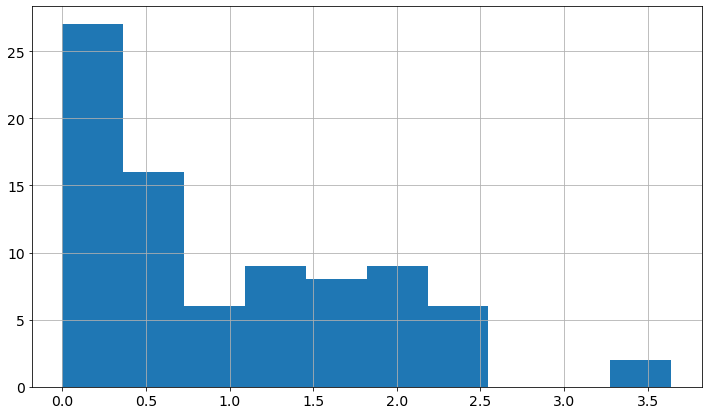

In [5]:
train.weight.hist()

## Establish baseline

In [6]:
# Establishing a baseline. Pre Req 1
baseline = train.weight.median()
baseline

0.66

## Weight and Average lengths

In [7]:
# Setting up variables for ols model
y= train.weight
x= train.avg_lengths
data=train

In [8]:
y, evaluate = ols_model(y, x, data, baseline)

Our model out performed our baseline
It makes sense to evaluate this model more thoroughly
Baseline SSE 66.35369999999999
Model SSE 7.817102155779006


In [9]:
evaluate.head()

,x,y,baseline,yhat,baseline_residuals,model_residual
119,15.64,1.87,0.66,1.691227,-1.21,-0.178773
30,15.43,2.03,0.66,1.653152,-1.37,-0.376848
42,8.41,0.26,0.66,0.380363,0.40,0.120363
89,8.59,0.30,0.66,0.412998,0.36,0.112998
62,6.19,0.13,0.66,-0.022143,0.53,-0.152143


In [10]:
# y array of actual y values (weights) evaluate.yhat is the predictions
median_absolute_error(y, evaluate.yhat)

0.19484981347665942

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

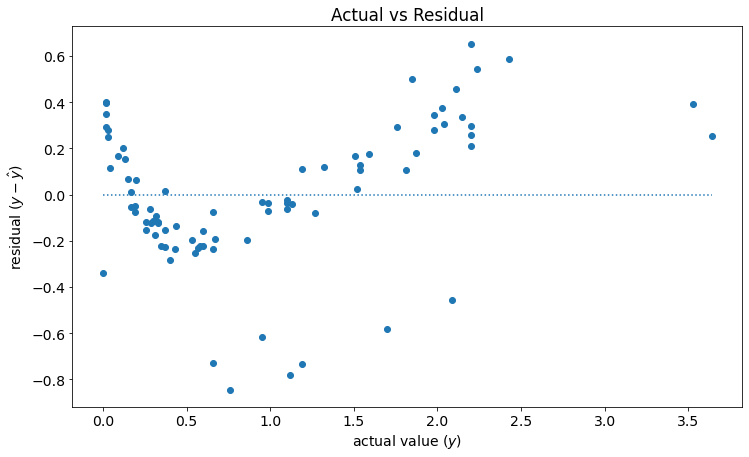

In [11]:
plot_residuals(y, evaluate.yhat)

## Weights and width

In [12]:
# Setting up variables for ols model
y= train.weight
x= train.width
data=train

In [13]:
y, evaluate = ols_model(y, x, data, baseline)

Our model out performed our baseline
It makes sense to evaluate this model more thoroughly
Baseline SSE 66.35369999999999
Model SSE 11.902007662007536


In [14]:
# y array of actual y values (weights) evaluate.yhat is the predictions
median_absolute_error(y, evaluate.yhat)

0.21586872043537986

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

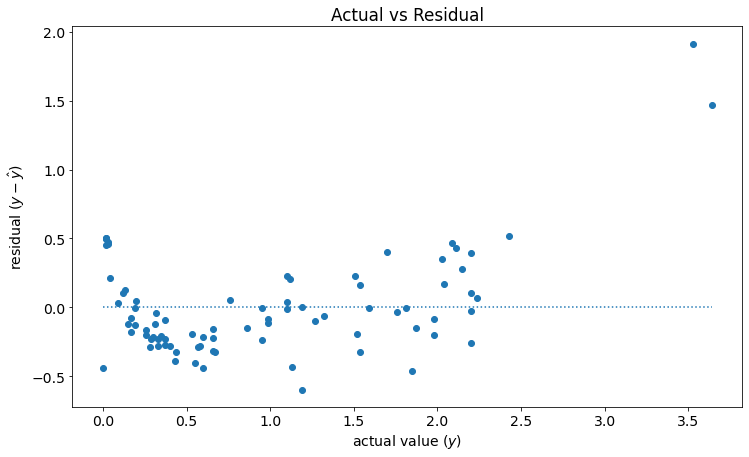

In [15]:
plot_residuals(y, evaluate.yhat)

## Weights and height

In [16]:
y= train.weight
x= train.height
y, evaluate = ols_model(y, x, data, baseline)

Our model out performed our baseline
It makes sense to evaluate this model more thoroughly
Baseline SSE 66.35369999999999
Model SSE 28.774140333425354


In [17]:
median_absolute_error(y, evaluate.yhat)

0.293086472221081

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

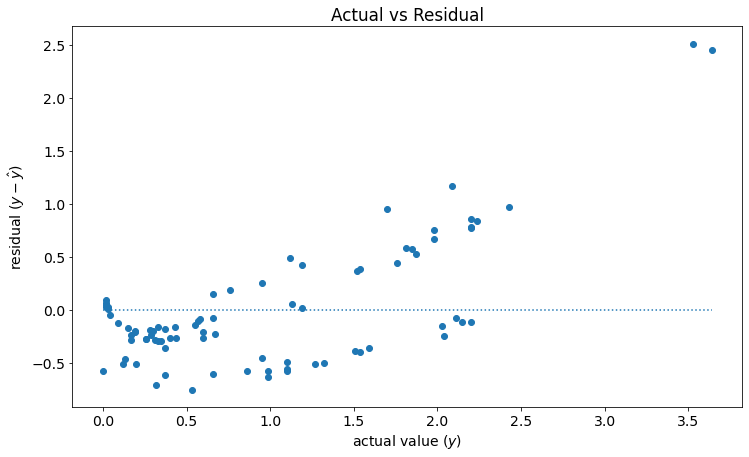

In [18]:
plot_residuals(y, evaluate.yhat)

## Weights and estimated area

In [19]:
y= train.weight
x= train.est_area
y, evaluate = ols_model(y, x, data, baseline)

Our model out performed our baseline
It makes sense to evaluate this model more thoroughly
Baseline SSE 66.35369999999999
Model SSE 10.77434722714355


In [20]:
median_absolute_error(y, evaluate.yhat)

0.12670934840844658

<AxesSubplot:title={'center':'Actual vs Residual'}, xlabel='actual value ($y$)', ylabel='residual ($y - \\hat{y}$)'>

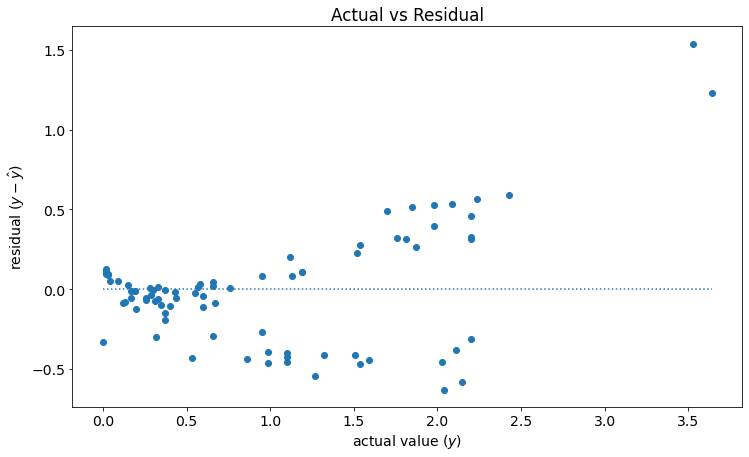

In [21]:
plot_residuals(y, evaluate.yhat)

## Regression Models with all features

In [22]:
y_train = train[['weight']]
columns_to_scale = ['vertical_length','diagonal_length','cross_length','height','width','avg_lengths','est_area']
X_train_scaled, X_validate_scaled, X_test_scaled = add_scaled_columns(train, validate, test, MinMaxScaler(), columns_to_scale)

## Linear Regression

In [23]:
lm_pred = linear_regression(X_train_scaled, y_train)

The models median absolute error is 0.063


## Laso Lars

In [24]:
laso_lars(X_train_scaled, y_train)

The models median absolute error is 0.821


## Plolynomial Regression

In [25]:
polynomial_features(X_train_scaled, y_train)

The models median absolute error is 0.086


## Regression Models with height, width, avg_lengths and est_area

In [26]:
columns_to_scale = ['height','width','avg_lengths','est_area']
y_train= train[['weight']]
y_validate= validate[['weight']]
y_test= test[['weight']]

X_train_scaled, X_validate_scaled, X_test_scaled  = add_scaled_columns(train, validate, test, MinMaxScaler(), columns_to_scale)

## Linear Regression

In [27]:
lm_pred = linear_regression(X_train_scaled, y_train)

The models median absolute error is 0.053


## Laso Lars

In [28]:
laso_lars(X_train_scaled, y_train)

The models median absolute error is 0.821


## Polynomial Regression

In [29]:
polynomial_features(X_train_scaled, y_train)

The models median absolute error is 0.04


## My models that had height, width avg_lengths, and est_area performed the best. Moving to the validate phase

# Validating

## Linear Regression

In [38]:
lm = LinearRegression(normalize=True)
lm.fit(X_train_scaled, y_train)

LinearRegression(normalize=True)

In [41]:
# Prediction of our validation set
lm_pred_v = lm.predict(X_validate_scaled)
lm_mse = median_absolute_error(y_validate, lm_pred_v)
print(f'The models median absolute error is {round(lm_mse,3)}')

The models median absolute error is 0.104


## Laso Lars

In [46]:
lars = LassoLars(alpha=1)
lars.fit(X_train_scaled, y_train)

LassoLars(alpha=1)

In [47]:
# Prediction of our validation set
lars_pred_v = lars.predict(X_validate_scaled)
# compute root mean squared error
lars_mse_v = median_absolute_error(y_validate, lars_pred_v)**(1/2)
print(f'The models median absolute error is {round(lars_mse_v,3)}')

The models median absolute error is 0.79


## Polynomial Features